Добрый день, уважаемый слушатель!

В этом документе вы найдёте все необходимое для настройки всех систем, используемых для работы с уроками в GoogleColab.

#  Первые шаги
Для начала, вам будут нужны будут аккаунты в следующих системах: 

## 1. [Google](https://www.google.com/) 

**1.1 Вход в аккаунт**

Этот аккаунт будет использоваться для размещения необходимых для урока файлов, аренды виртуальной машины, а так же для упрощенной регистрации в остальных необходимых системах.
Мы предоставили вам логин/пароль от аккаунта, сейчас вам необходимо в него войти. 

**1.2 Настройка диска**

На диске мы будем хранить следующие файлы, нужные для полноценной работы с Jupyer Notebook.
Давайте создадим папки под них.



*   Ключ ssh для подключения к репозиторию в  GitHub



Перейдя в диск (https://drive.google.com/), в правом верхнем углу нажмите кнопку 
“**+ Создать”** -> **“Создать папку”**

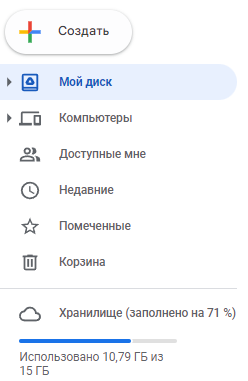
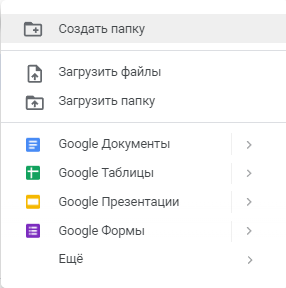

Назовите эту папку “ssh”. В неё мы с помощью скрипта создадим ключ для доступа в аккаунт Github изнутри.



*   Ссылка на папку с изображениями для обучения модели



Изображения весят ~3Гб, и предварительно загружены для вашего использования в другой аккаунт Google. 
Чтобы не копировать эти 10 000 изображений себе на диск, давайте создадим ярлык, ведущий непосредственно к ним.

Перейдите по ссылке, ведущей в папку “data”: 

https://drive.google.com/drive/folders/1nO1v0JZg3E7fgVr8CqT7t3I8oZnGurYN?usp=sharing

Затем, выберите эту папку в иерархии. Среди опций нужно выбрать опцию **“Добавить ярлык на Диск”** ->**”Мой диск”**

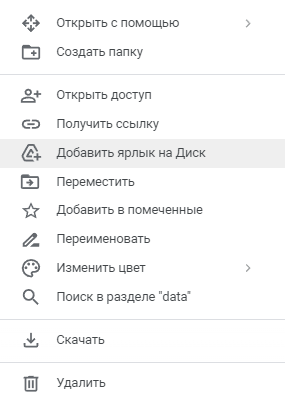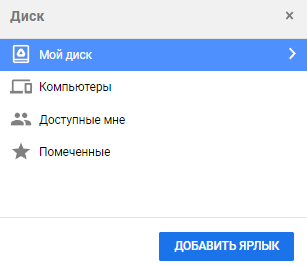

В итоге у вас должны появиться вот такие две папки:

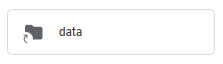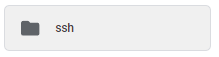

##  2.[Github](https://github.com/) 

Аккаунт будет использоваться для доступа к учебному репозиторию с кодом для урока.  Если у вас уже есть аккаунт Github, зайдите в него. 
Если же аккаунта нет, то самым простым способом его завести, будет привязав уже существующий  аккаунт Google.

В правом верхнем углу, нажмите **“Sign Up”**.

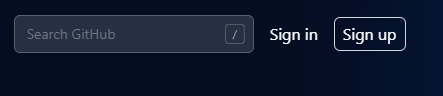

В открывшемся окне, введите вашу почту Google, придумайте пароль, логин, и в зависимости от того, хотите ли вы рассылки, **‘y’** или **‘n’**. Пример заполнения можете увидеть ниже: 

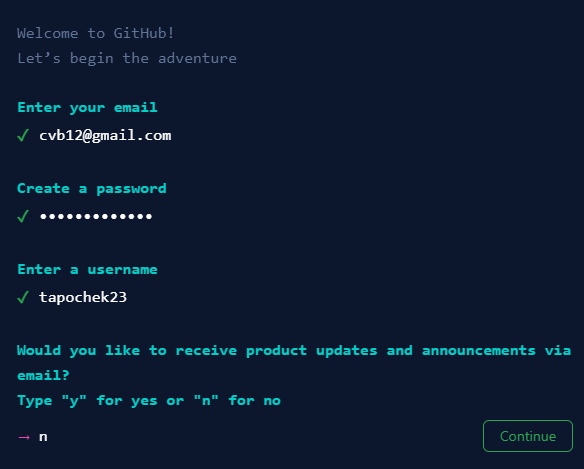

На указанную почту придёт письмо с подтверждением. Перейдите по ссылке для активации аккаунта.

Остался последний аккаунт, который нам нужно создать.

## [3.Weights&Biases](https://wandb.ai/site)

Этот аккаунт нужен для логирования и отслеживания работы системы машинного обучения. Мы будем подключаться к этому аккаунту изнутри GoogleColab для записи всех действий по обучению модели и просмотру статистики.

В верхней правой части, так же жмём **“Sign Up”**->**”Sign Up with GitHub”**. 
Далее на вашу  почту Google придёт вот такое письмо со ссылкой верификации. Переходим по ссылке. 

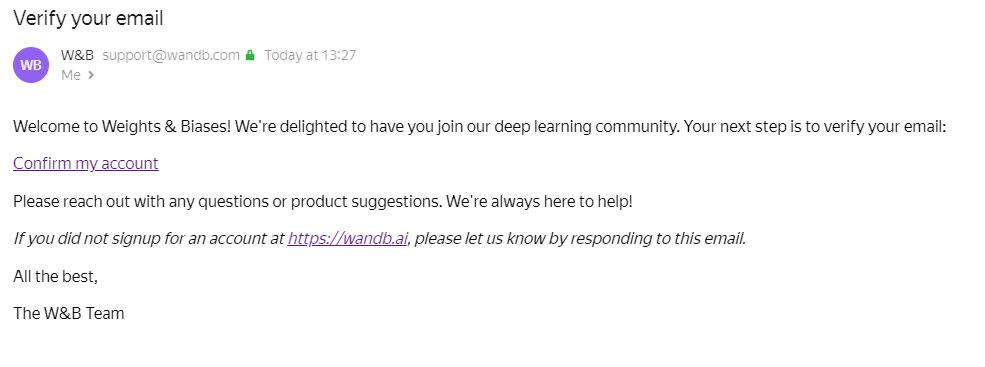

 Заполняем данные для аккаунта, и жмём **“Continue”**.
 Организацию можно выбрать любую, имя тоже.

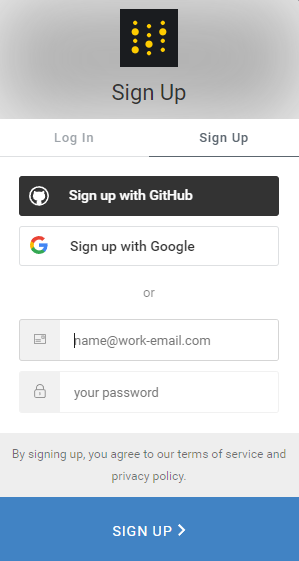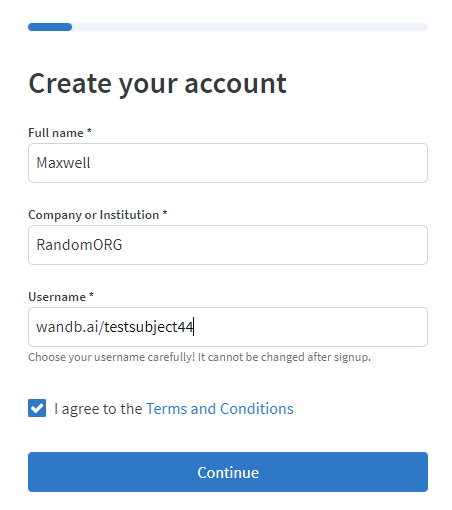

Далее вас встретят множество вопросов про ваш опыт в ML. Можно выбирать любые варианты ответа, вплоть до пункта где предложат выбрать команду. Выбираем опции как показано ниже.

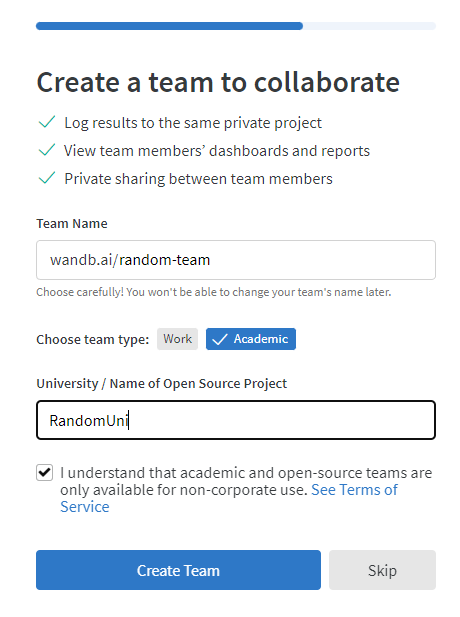

На страничке “Пригласить в команду” выбираем **“Skip”**

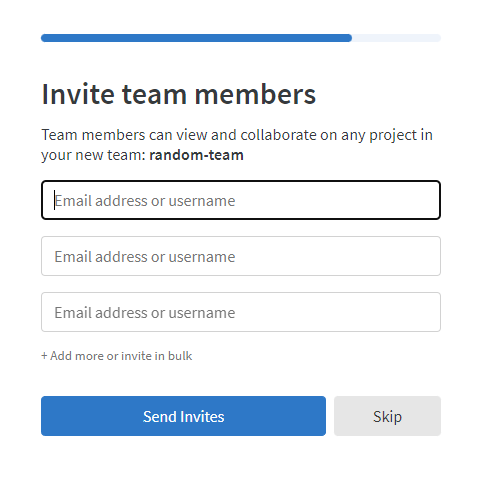

После успешного завершения регистрации, переходим на [домашнюю страницу WandB.](https://wandb.ai/home)

Нас интересует тут ключ API, именно он позволит подключаться изнутри GoogleColab. Копируем его.

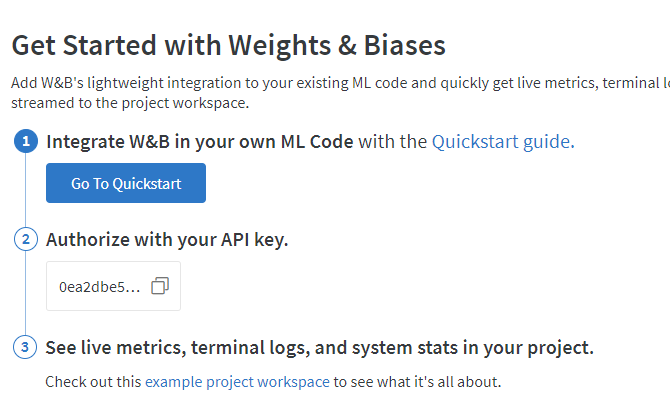

Чтобы этот ключ успешно подгружался, его необходимо положить в наш Google Drive в виде текстового документа.

На Рабочем Столе создаем Текстовый документ и называем его *“wandbkey.txt”*. Внутрь вставляем  наш ключ.

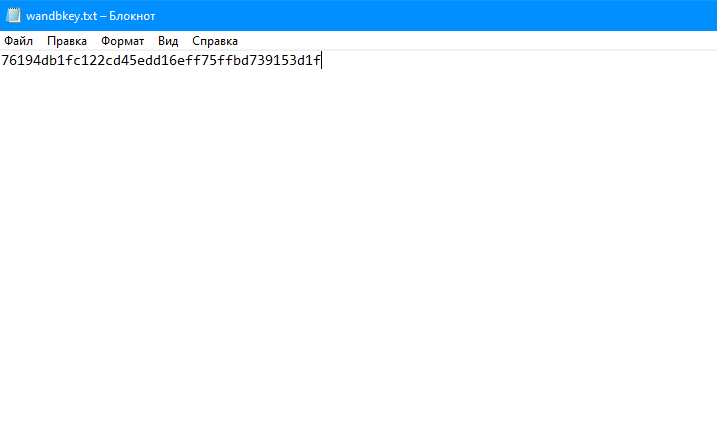

Данный файл перетаскивам на наш Google Drive в папку ssh.

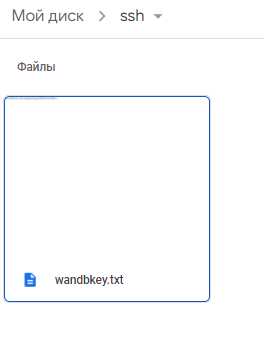

# Подключение к Google Drive
Нам мужно будет поддерживать подключение с Google Drive, чтобы хранить ключи авторизации, логи, а так же получить доступ к материалам курса

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Выполняя этот сегмент кода, вас попросят разрешить доступ к вашему диску Google. Код будет смотреть только файлы, непосредственно связанные с обучением, и никто кроме вас не получит данные об этом. 
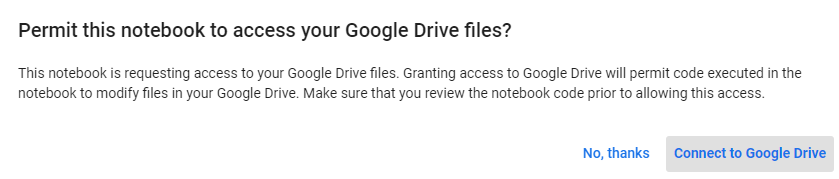
Вы увидите всплывающее окно с выбором аккаунта Google. Необходимо выбрать тот аккаунт, в диск которого вы создавали все папки. Затем разрешаем доступ к вашему диску.
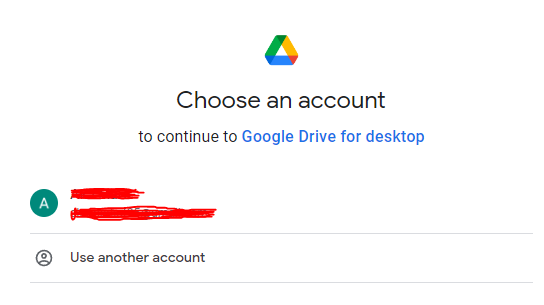
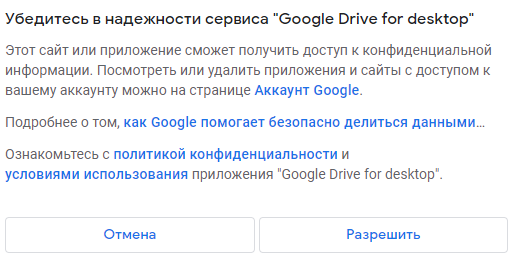

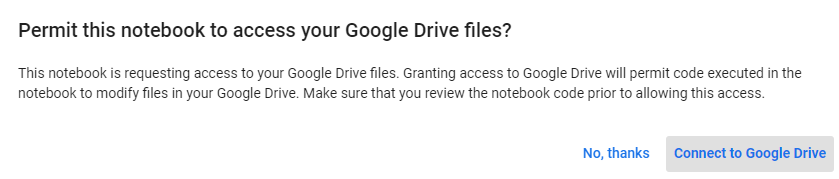

Вы увидите всплывающее окно с выбором аккаунта Google. Необходимо выбрать тот аккаунт, в диск которого вы создавали все папки. Затем разрешаем доступ к вашему диску.

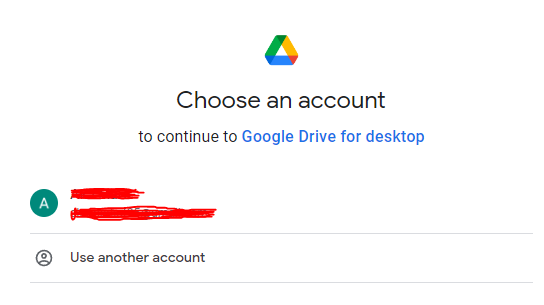

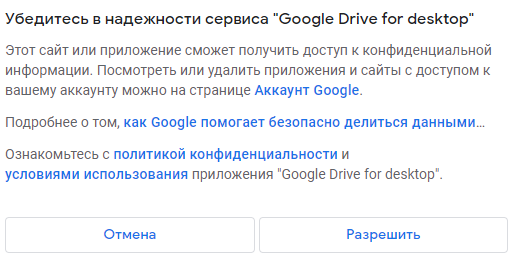

# Создание конфигурации GitHub


Нужно сделать метод авторизации изнутри программного кода. 
Для этого один раз запустите следующую ячейку

In [ ]:
!ln -s /content/drive/MyDrive/ssh ~/.ssh
!ssh-keygen -t rsa -b 4096

Она подключится к вашему диску, зайдёт в папку ssh и оставит там сгенерированный файл, который нужно будет потом ввести в учетной записи GitHub. Запускаем.
Вас попросят ввести имя файла, пароль, и подтвердить пароль. 
Во избежание путаницы, просто выбирайте поле для ввода и нажмите “Enter”. Это создаст необходимые файлы в папке ssh на вашем диске.

Выбираем id_rsa.pub, нажимаем правой кнопкой мыши, и **“Скачать”**.

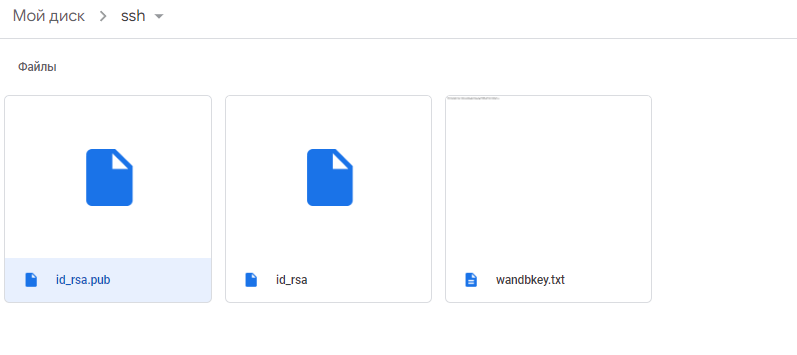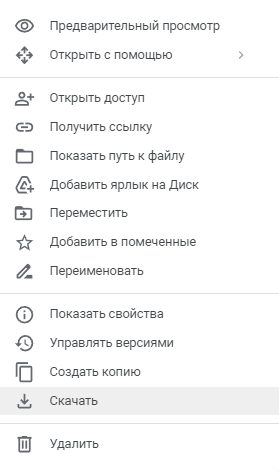

Скачанный файл открываем в Блокноте или любой другой похожей программе. Видим внутри него вот такой шифр: 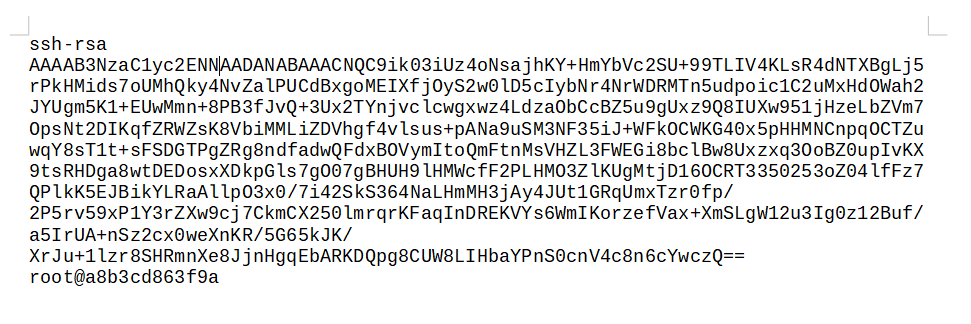

Копируем его полностью. Он нужен нам для авторизации в GitHub посредством сгенерированного ключа в вашей папке GoogleDrive.

Чтобы соединить авторизацию, заходим в GitHub, в правом верхнем углу нажимаем на иконку вашего аккаунта, выбираем **Settings**.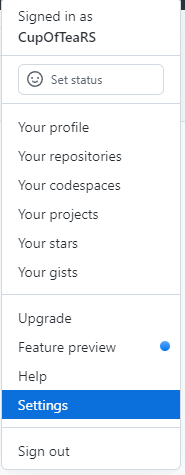

В левом меню выбираем **SSH and GPG keys**, затем жмём 
**New SSH key**.

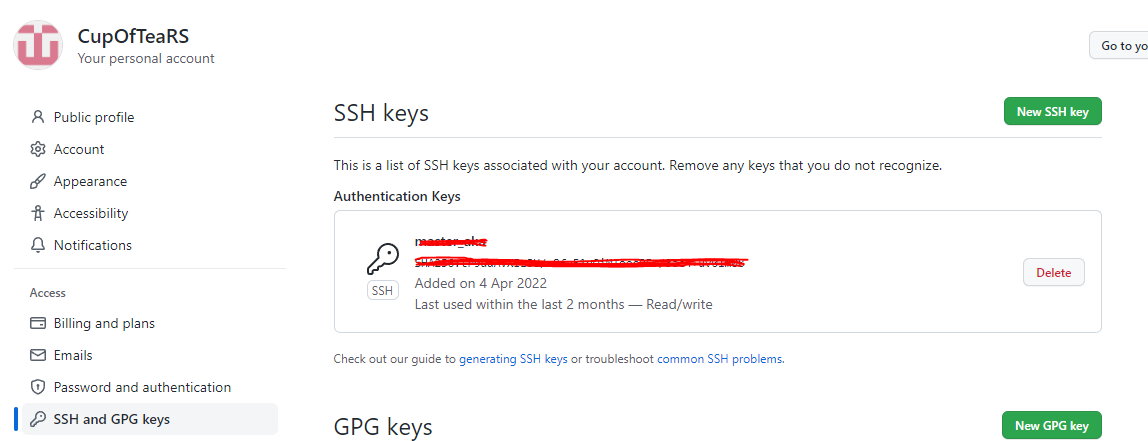

В появившемся окошке выбираем название и вставляем наш шифр. Жмём **“Add SSH key”**

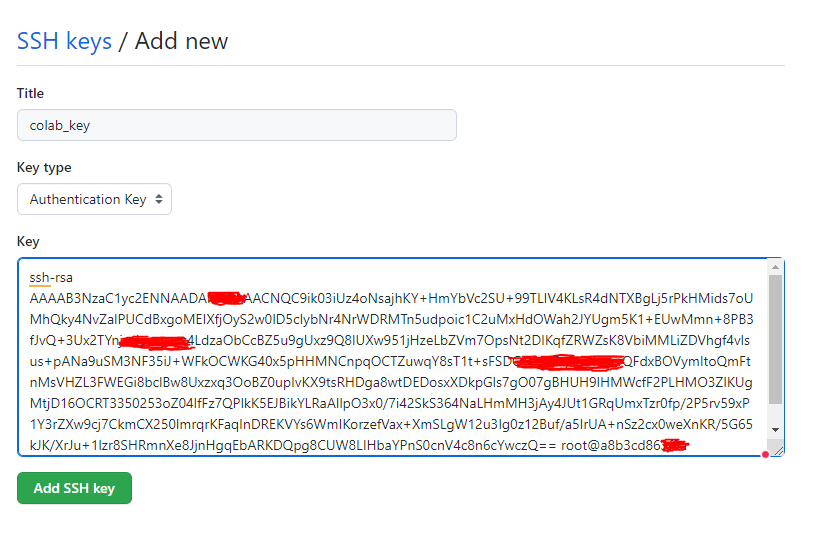

Ваш ключ должен появиться сразу же.

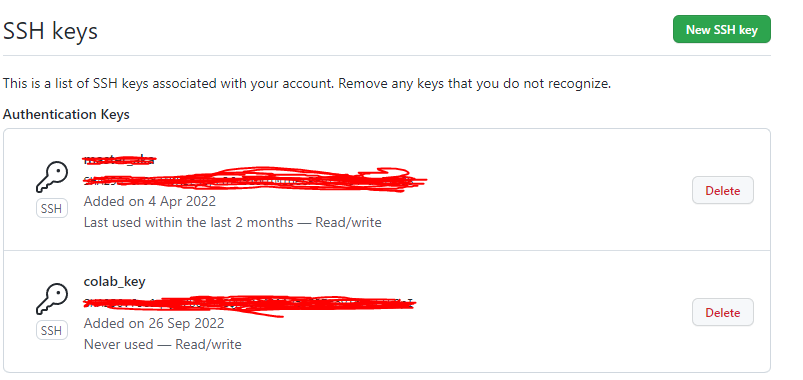

# Клонирование репозитория из GitHub

Для клонирования репозитория из GitHub, необходимо сначала его клонировать в свой аккаунт.
На ваш аккаунт было выслано приглашение в проект Deep Learning. Чтобы его принять, перейдите в пункт меню **Your Organizations**, и нажмите **Join**, затем **Accept Invitation**

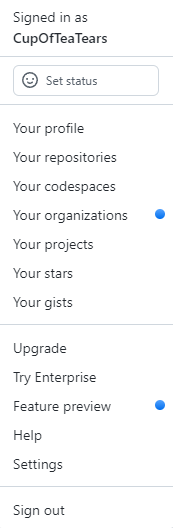
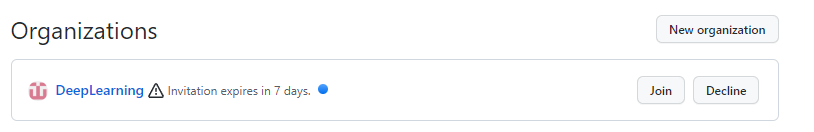
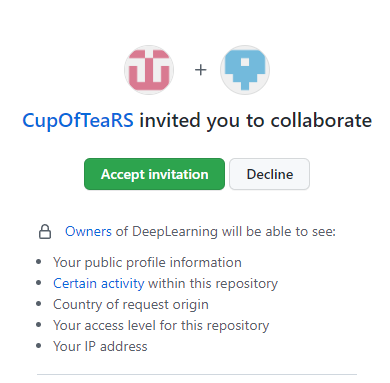

Попав в проект, нужно полностью скопировать его себе. 
Для этого нажмём **Fork** в правой верхней части страницы.

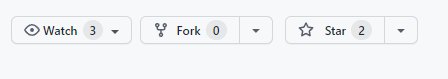

Напротив **Copy the master branch only** убираем галочку, чтобы скопировать все нужные ветки.

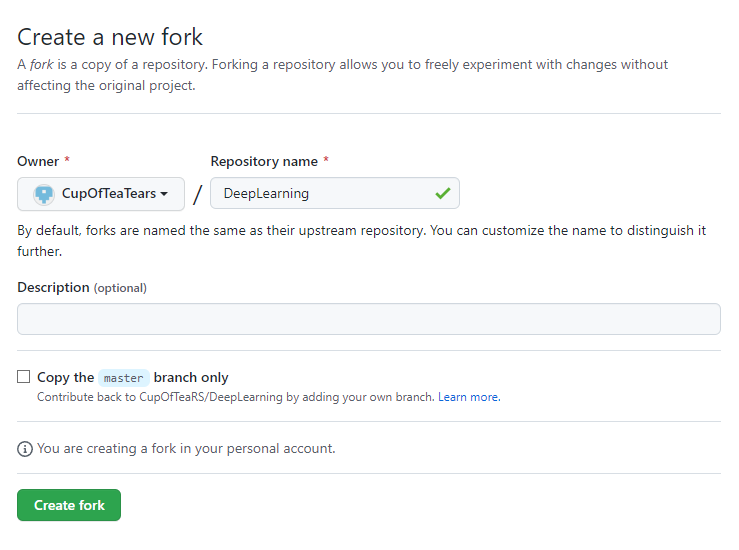

Исполняя следующую ячейку, репозиторий с кодом с помощью ssh ключа, сгенерированного выше, скачается на Google Drive. Можно указать любую удобную папку на диске. 

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!ssh -T git@github.com
!git clone -b google_colab git@github.com:CupOfTeaRS/DeepLearn.git /content/drive/MyDrive/github/  # здесь можно указать папку в Drive

В каждой следующей тетрадке вам нужно будет просто указать путь к папке с кодом, чтобы подгрузить оттуда все модули. 